# Getting AI smarter with Q-learning: a simple first step in Python 

![](graph.png)

http://firsttimeprogrammer.blogspot.de/2016/09/getting-ai-smarter-with-q-learning.html

# networkx 

In [4]:
import networkx as nx
import pylab as plt

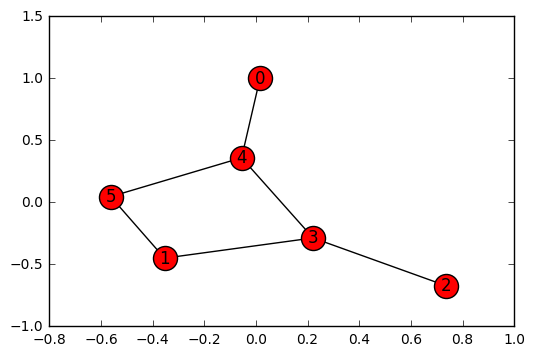

In [339]:
points_list = [(1,3), (1,5),
               (3,2), (3,4),(5,4),
               (4,0)
              ]

goal = 5

G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

# Q Learning

In [36]:
import numpy as np

In [455]:
# R matrix (sate x action)
# target: pre-limit the environment for possible moves and goal state
# R is pre defined but imaging an agent recive imidietly 
R = np.matrix([[-1,-1,-1,-1,0,-1],
               [-1,-1,-1,0,-1,100],
               [-1,-1,-1,0,-1,-1],
               [-1,0,0,-1,0,-1],
               [-1,0,0,-1,-1,100],
               [-1,0,-1,-1,0,100]])


# Q matrix (state x action) / Initial as NULL placeholder
Q = np.matrix(np.zeros([6,6]))

# Gamma (learning parameter).
gamma = 0.8


# Initial state. (Usually to be chosen at random)
initial_state = 1

In [456]:
# availible actions

def available_actions(state, R):
    
    """
    This function returns all available actions given a state through t.
    """
    
    # given the current state row where is a possible action = non negative reward
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act


# Get available actions in the initial state
available_act = available_actions(initial_state, R)

print("The availible actions is in state", initial_state, "are" , available_act,"!")

The availible actions is in state 1 are [3 5] !


In [457]:
# stochastic choose of the next action 
# not choosen by the observed policy from teh visited states cause of the unvisitstates

def sample_next_action(available_actions_range):
    
    """
    This function chooses at random which action to be performed within the range 
    of all the available action
    """

    next_action = int(np.random.choice(available_act, 1))
    return next_action


# Sample next action to be performed
action = sample_next_action(available_act)

print("Next action is: go to ", action)

Next action is: go to  3


**Q Value**
$$
Q(s,a) = r(s,a) + \gamma \max_{a'}{\hat{Q}(s, a')}
$$

e.g the Q Value in state 1 for the action a = 5 is:

$$
Q(1,5) = r(1,5) + \gamma \max{(Q(5,1), (5,4), (5,5))}
$$

In [458]:
# Update Q table after choose an action.

def update(Q, current_state, action, gamma):
    
    """
    This function updates the Q matrix according to the path selected and the Q 
    learning algorithm
    """
    
    # max Q_hat: get the index with the max Q_hat value
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        # if several possible max get randomly one
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        # else get the max index
        max_index = int(max_index)
        
    max_value = Q[action, max_index]    

    # update Q tabel: Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value


# Update Q matrix for the first move (1, 5)
update(Q, initial_state, action, gamma)

# Training after first iteration

In [459]:
Q

matrix([[ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [460]:
# Train over 10 000 iterations. (Re-iterate the process above).

max_it = 10000

for i in range(max_it):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state, R)
    action = sample_next_action(available_act)
    update(Q, current_state,action,gamma)
    
    # Training Status
    x = int(round(i / (max_it * 0.1) )) 
    percent = round(i / (max_it * 0.01))
    print("\r ", "Training Status:" + str(percent) + "% " + "." * x, end = "")

  Training Status:100% ..........

In [462]:
# Normalize the "trained" Q matrix
print("Trained Q matrix: \n")
pd.DataFrame(Q/np.max(Q)*100)

Trained Q matrix: 



,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,80.0,0.0
1,0.0,0.0,0.0,64.0,0.0,100.0
2,0.0,0.0,0.0,64.0,0.0,0.0
3,0.0,80.0,51.2,0.0,80.0,0.0
4,0.0,80.0,51.2,0.0,0.0,100.0
5,0.0,80.0,0.0,0.0,80.0,100.0


# Optimal Policy Current State = 2

In [463]:
# Goal state = 5
# Best sequence path starting from 2 -> 2, 3, 1, 5

current_state = 2
steps = [current_state]
count = 0


while current_state != 5:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index
    
    count += 1
    print("Moves: {}: {}". format(count, steps), end = "\n")
    


# Print selected sequence of steps

print("\n Selected path:")
print(steps)

Moves: 1: [2, 3]
Moves: 2: [2, 3, 1]
Moves: 3: [2, 3, 1, 5]

 Selected path:
[2, 3, 1, 5]


![](graph_policy.png)